In [20]:
import pandas as pd

table = pd.read_csv("data/train.csv")
table.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


In [21]:
table = table.drop(['ID'], axis=1)
table['Gender'] = table.Gender.apply(lambda x: 1 if x == "Male" else 0)
# table['Satisfaction'] = table.Satisfaction.apply(lambda x: 1 if x=='Satisfied' else 0)


In [22]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  84967 non-null  int64  
 1   Age                                     84967 non-null  int64  
 2   Customer Type                           84967 non-null  object 
 3   Type of Travel                          84967 non-null  object 
 4   Class                                   84967 non-null  object 
 5   Flight Distance                         84967 non-null  int64  
 6   Departure Delay                         84967 non-null  int64  
 7   Arrival Delay                           84705 non-null  float64
 8   Departure and Arrival Time Convenience  84967 non-null  int64  
 9   Ease of Online Booking                  84967 non-null  int64  
 10  Check-in Service                        84967 non-null  in

In [23]:
numeric_features = [
    "Age",
    "Flight Distance",
    "Departure Delay",
    "Arrival Delay",
]

cat_features = [col for col in table.columns if col not in numeric_features]
cat_features

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

In [24]:
for col in cat_features:
    print(table.loc[:, col].value_counts())
    print()

Gender
0    42927
1    42040
Name: count, dtype: int64

Customer Type
Returning     71524
First-time    13443
Name: count, dtype: int64

Type of Travel
Business    64961
Personal    20006
Name: count, dtype: int64

Class
Business        48243
Economy         31423
Economy Plus     5301
Name: count, dtype: int64

Departure and Arrival Time Convenience
4    20138
5    18217
3    14760
2    14250
1    13112
0     4490
Name: count, dtype: int64

Ease of Online Booking
3    18198
2    17840
4    17178
5    13830
1    13592
0     4329
Name: count, dtype: int64

Check-in Service
4    24192
3    23530
5    19034
2     9197
1     9013
0        1
Name: count, dtype: int64

Online Boarding
4    28556
5    22372
3    13995
2    11021
1     6813
0     2210
Name: count, dtype: int64

Gate Location
3    21938
4    19284
2    16263
1    15005
5    12476
0        1
Name: count, dtype: int64

On-board Service
4    26999
5    22263
3    17250
2    10422
1     8031
0        2
Name: count, dtype: int64

Se

In [25]:
table.loc[:, numeric_features].describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,84967.000000,84967.000000,84967.000000,84705.00000
mean,40.128426,1295.579531,14.044111,14.29147
std,14.467548,1051.170909,37.528018,37.85288
min,7.000000,31.000000,0.000000,0.00000
25%,29.000000,438.000000,0.000000,0.00000
50%,41.000000,925.000000,0.000000,0.00000
75%,51.000000,1979.000000,11.000000,12.00000
max,85.000000,4983.000000,1592.000000,1584.00000


In [26]:
table.fillna(0)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,46,Returning,Business,Business,1608,0,0.0,1,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,1,30,Returning,Business,Business,1379,30,32.0,5,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,0,50,Returning,Business,Business,414,0,0.0,5,4,...,4,5,4,5,3,4,5,4,4,Satisfied
3,0,48,Returning,Business,Economy,95,0,0.0,3,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,0,24,Returning,Business,Economy Plus,143,0,0.0,5,0,...,5,1,2,1,1,3,0,1,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,1,49,First-time,Business,Business,1310,0,0.0,3,3,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
84963,1,7,Returning,Personal,Economy Plus,650,0,0.0,3,2,...,2,1,4,1,1,4,2,1,3,Neutral or Dissatisfied
84964,0,19,Returning,Personal,Economy,363,0,0.0,5,3,...,5,5,3,5,5,5,3,5,5,Neutral or Dissatisfied
84965,1,58,Returning,Business,Business,3445,9,5.0,1,1,...,5,5,5,3,5,5,1,5,5,Satisfied


<Axes: >

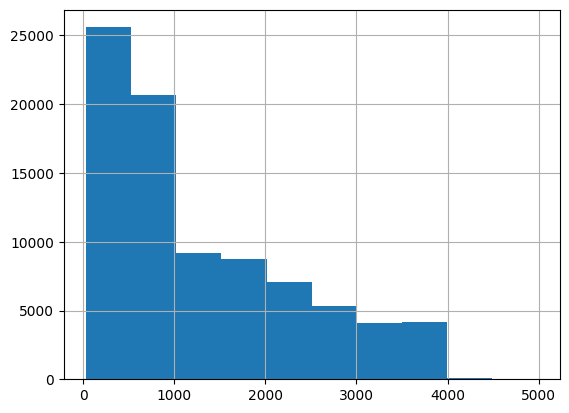

In [ ]:
table.loc[:, "Flight Distance"].hist()